In [182]:
import pandas as pd
import numpy as np
import sklearn.naive_bayes as nB
from sklearn.model_selection import ShuffleSplit, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.manifold import LocallyLinearEmbedding

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [ ]:
df = pd.read_csv('preprocess.csv')

In [ ]:
X = df.loc[:, df.columns != 'prob']
y = df['prob']

In [ ]:
gnb = GaussianNB()

In [ ]:
title = "Learning Curve (Naive Bayes)"

cv = ShuffleSplit(n_splits=200, test_size=0.3, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(-0.01, 1.01),
                    cv=cv, n_jobs=16)

In [ ]:
StandardScalerr = StandardScaler()
X_standart = StandardScalerr.fit_transform(X)
X_standart = pd.DataFrame(X_standart, columns=X.columns)

In [ ]:
hist = X_standart.hist(bins=50, figsize=(20,20))
box = X_standart.boxplot()
plt.xticks(rotation='vertical')
plt.xticks(rotation='horizontal')
for name in X_standart.columns:
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    X_standart.boxplot(column=name,ax=axes[0])
    X_standart.hist(column=name, ax=axes[1])
plt.show()

In [ ]:
title = "Learning Curve (Naive Bayes) Standarized"

cv = ShuffleSplit(n_splits=200, test_size=0.3, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_standart, y, ylim=(-0.01, 1.01),
                    cv=cv, n_jobs=16)

In [ ]:
n_components = 5
columns = df.columns
pca = decomposition.PCA(n_components=n_components)
pca.fit(X_standart)


eigenvalues = sorted(list(pca.explained_variance_ratio_), reverse=True)
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = X.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]



In [ ]:
X_pca = pd.DataFrame(pca.transform(X_standart), columns=most_important_names)
X_pca

In [ ]:
hist = X_pca.hist(bins=50, figsize=(20,20))
box = X_pca.boxplot()
plt.xticks(rotation='vertical')
plt.xticks(rotation='horizontal')
for name in X_pca.columns:
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    X_pca.boxplot(column=name,ax=axes[0])
    X_pca.hist(column=name, ax=axes[1])
plt.show()

In [ ]:
title = "Learning Curve (Naive Bayes) with PCA and Standarized"

cv = ShuffleSplit(n_splits=200, test_size=0.3, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_pca, y, ylim=(-0.01, 1.01),
                    cv=cv, n_jobs=16)

In [193]:
MinMaxScalerr = MinMaxScaler()
X_scaled = MinMaxScalerr.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,age,sex,presure_blood_resting,colesterol,cigarettes_per_day,smoker_years,sugar,max_heart_rate,res_heart_rate,blood_presure_sistoles,...,major_vessels_1.0,major_vessels_2.0,major_vessels_3.0,electrocardio_0.0,electrocardio_1.0,electrocardio_2.0,chest_pain_1.0,chest_pain_2.0,chest_pain_3.0,chest_pain_4.0
0,0.714286,1.0,0.602273,0.445783,0.714286,0.333333,1.0,0.596899,0.277108,0.647887,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.795918,1.0,0.772727,0.605422,0.571429,0.666667,0.0,0.271318,0.325301,0.436620,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.795918,1.0,0.318182,0.433735,0.285714,0.583333,0.0,0.434109,0.493976,0.295775,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.183673,1.0,0.431818,0.496988,0.000000,0.000000,0.0,0.883721,0.566265,0.683099,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.265306,0.0,0.431818,0.358434,0.000000,0.000000,0.0,0.767442,0.409639,0.436620,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.428571,0.0,0.409091,0.443373,0.157143,0.500000,0.0,0.542636,0.501205,0.422535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1158,0.428571,0.0,0.409091,0.443373,0.157143,0.500000,0.0,0.542636,0.501205,0.422535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1159,0.428571,0.0,0.409091,0.443373,0.157143,0.500000,0.0,0.542636,0.501205,0.422535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1160,0.428571,0.0,0.409091,0.443373,0.157143,0.500000,0.0,0.542636,0.501205,0.422535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<module 'matplotlib.pyplot' from 'C:\\Users\\danie\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

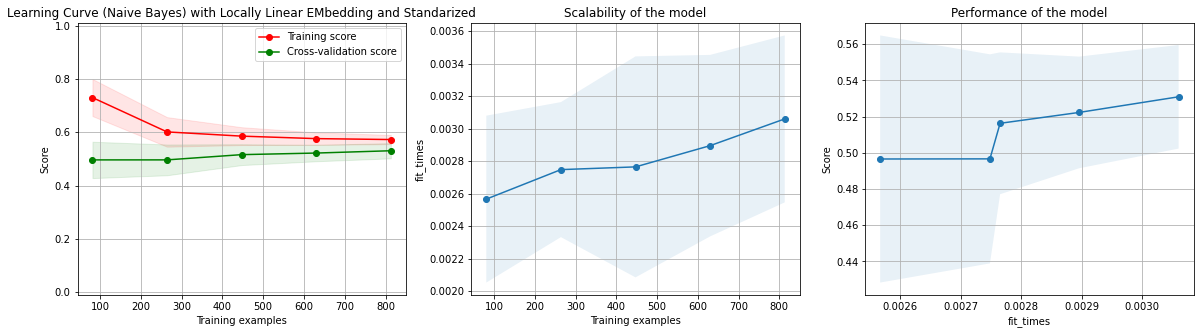

In [196]:
columns = X_scaled.columns
LocallyLinear = LocallyLinearEmbedding(n_components=len(columns))
X_locally = pd.DataFrame(LocallyLinear.fit_transform(X_scaled), columns =columns)


title = "Learning Curve (Naive Bayes) with Locally Linear EMbedding and Standarized"

cv = ShuffleSplit(n_splits=200, test_size=0.3, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_locally, y, ylim=(-0.01, 1.01),
                    cv=cv, n_jobs=16)

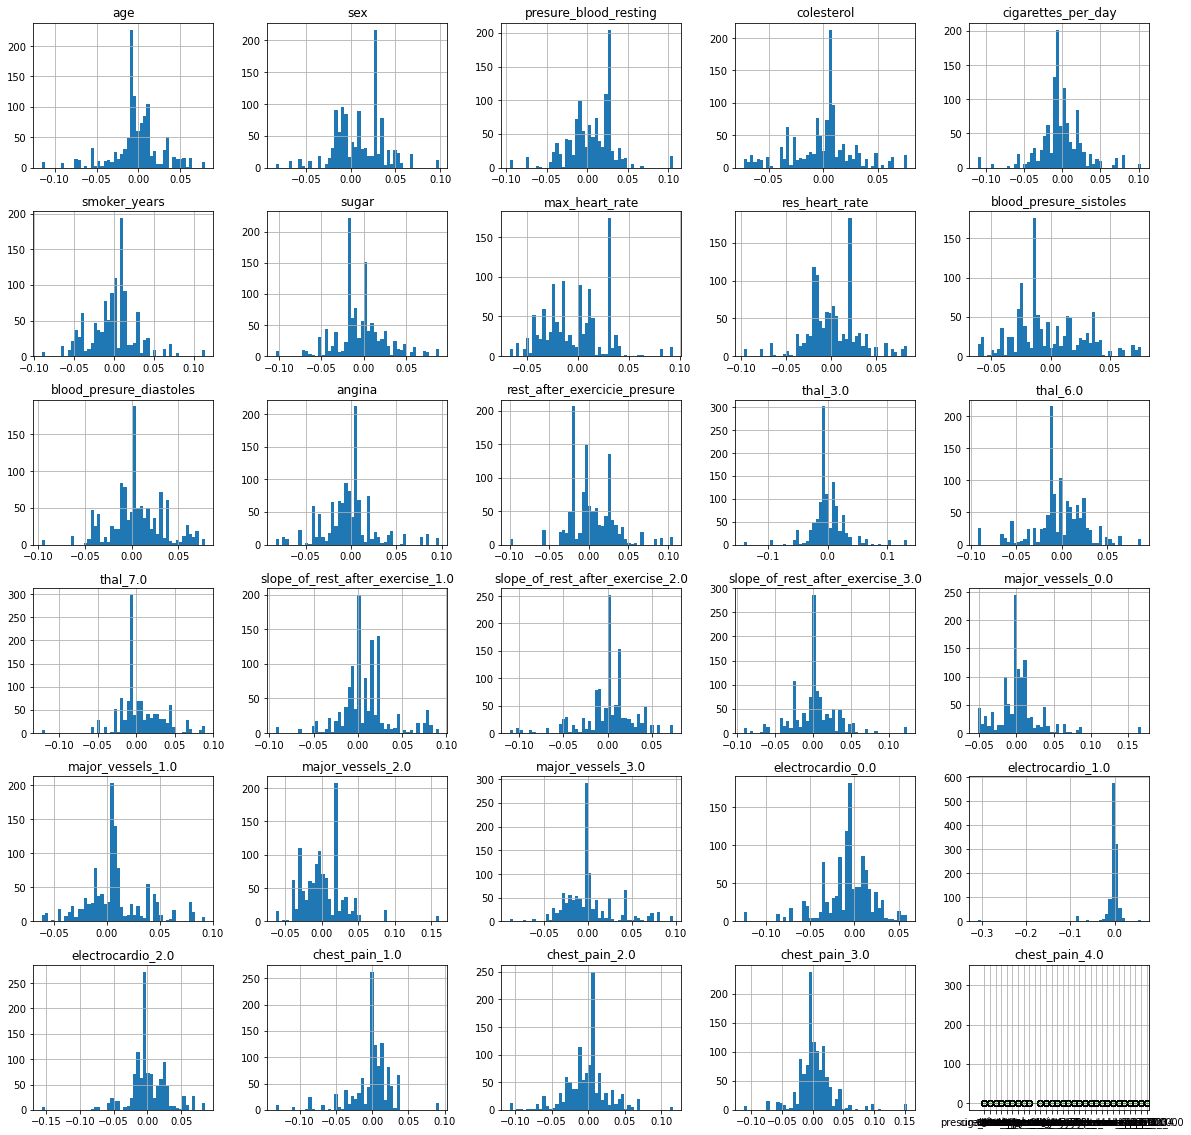

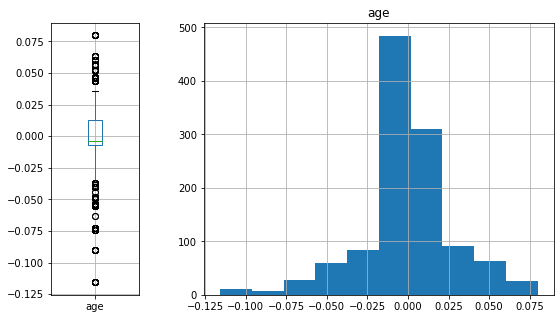

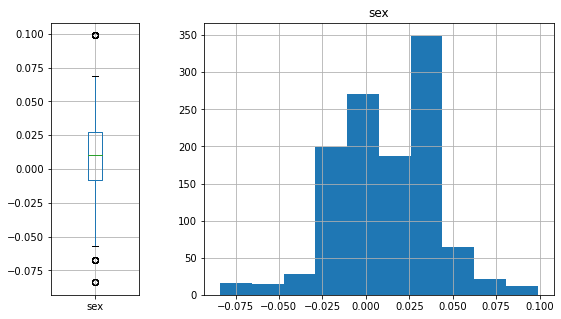

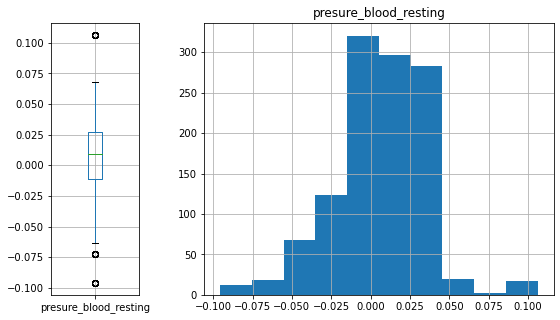

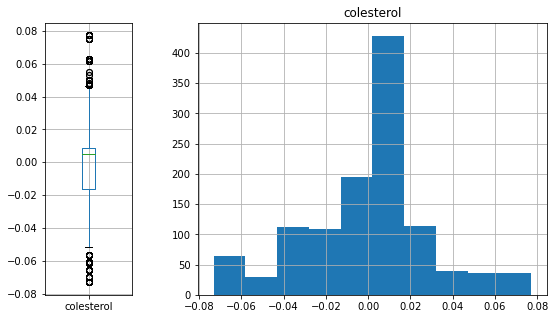

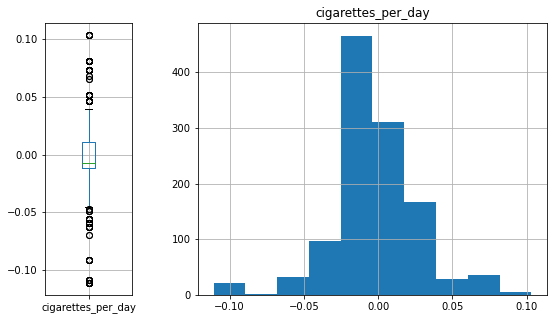

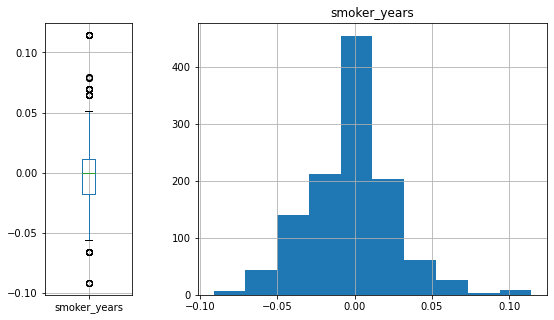

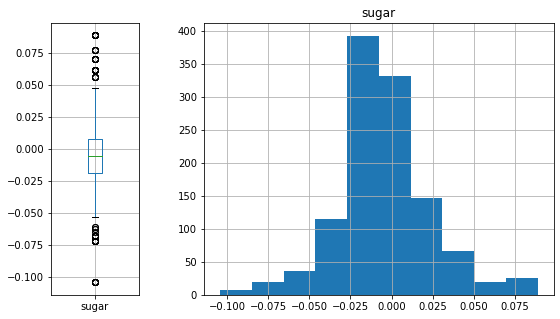

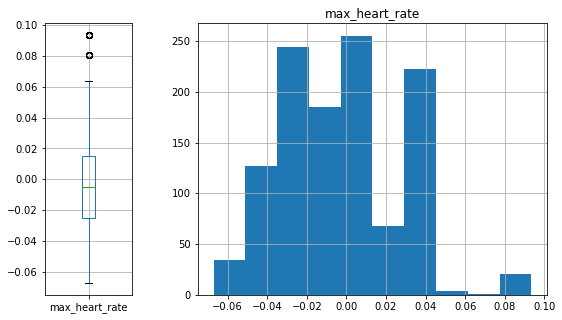

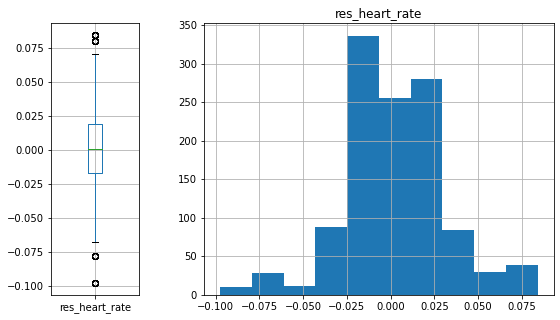

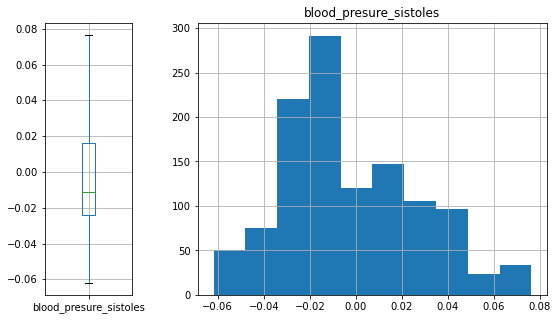

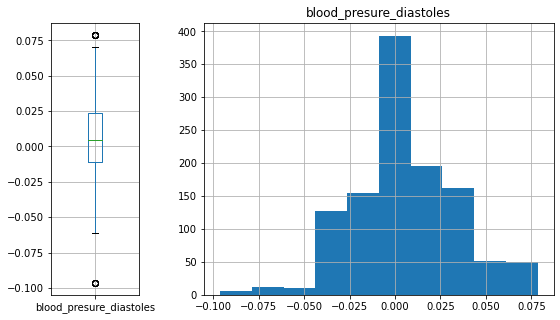

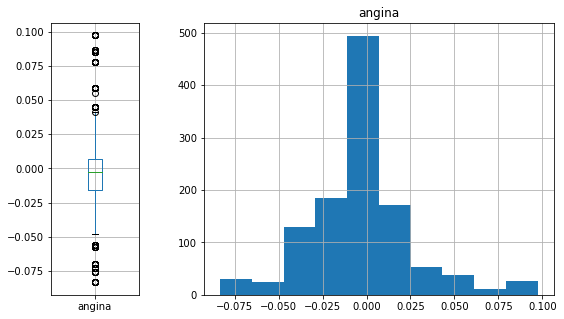

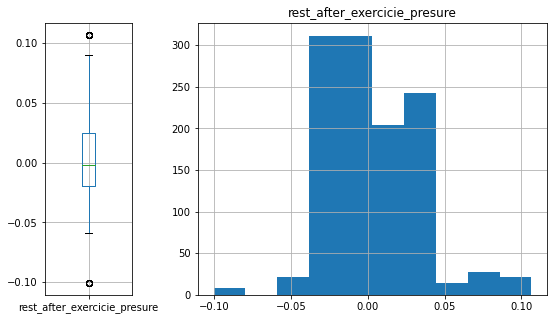

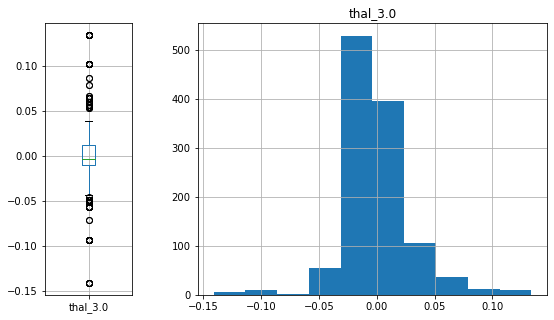

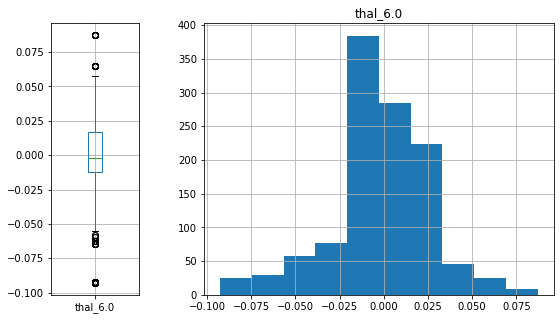

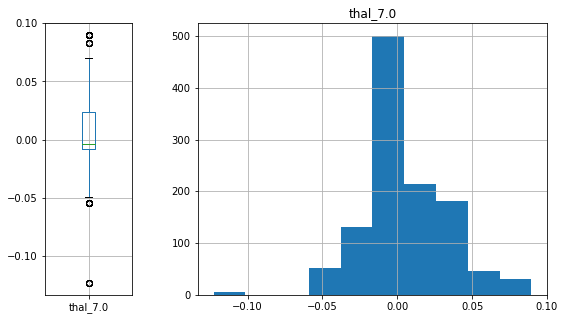

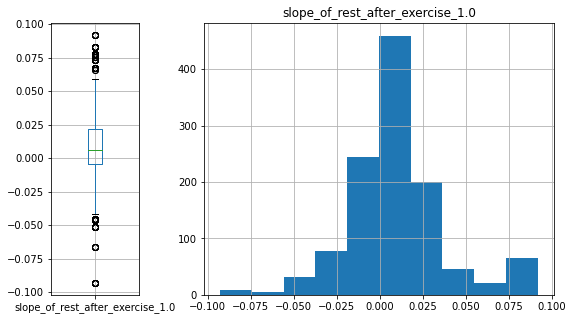

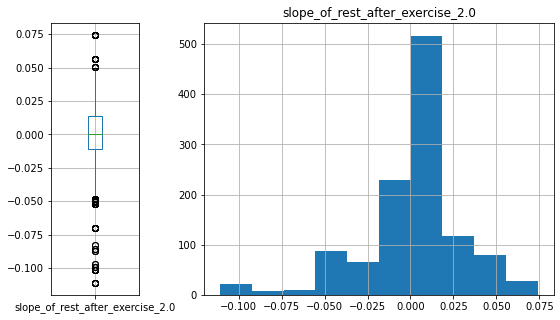

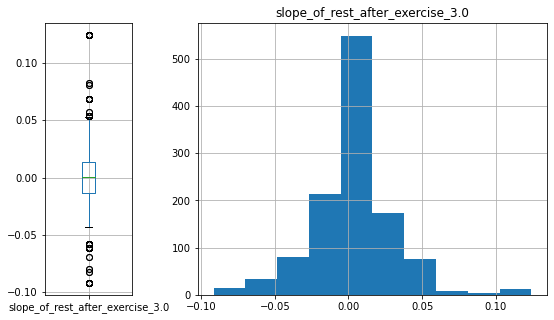

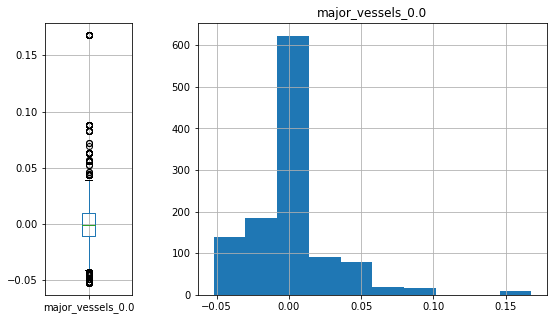

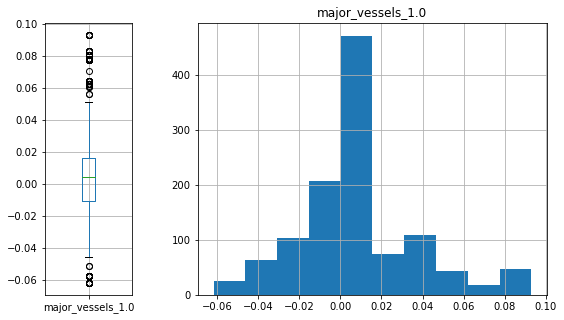

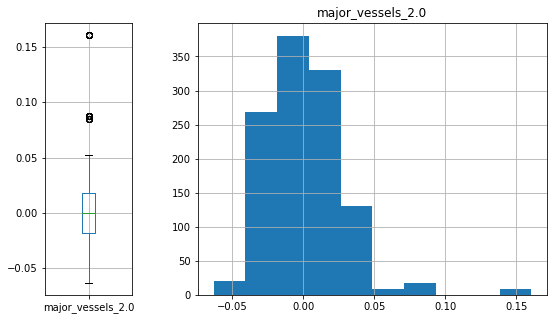

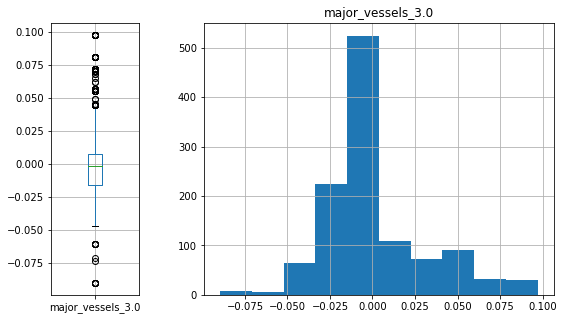

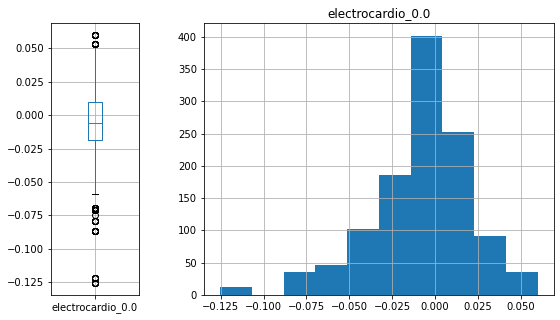

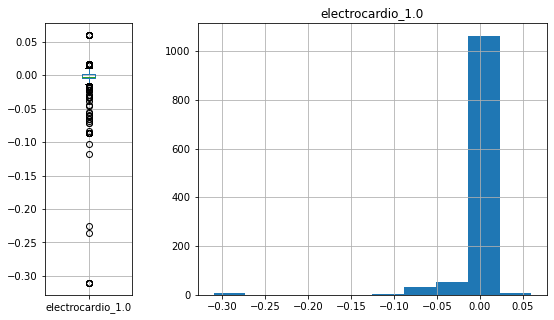

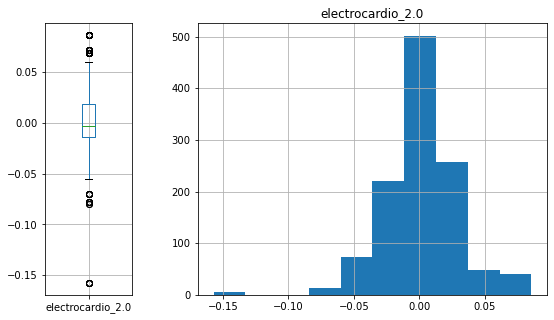

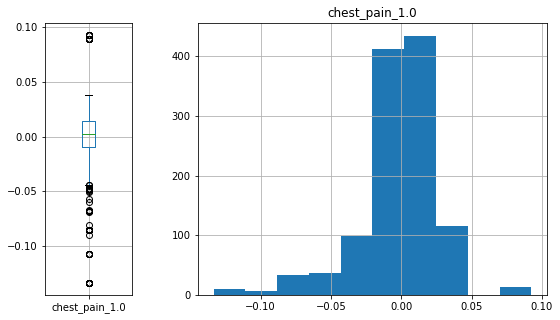

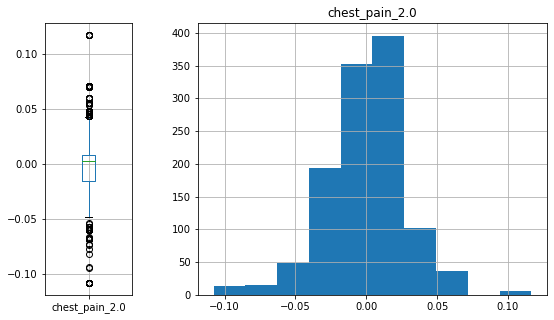

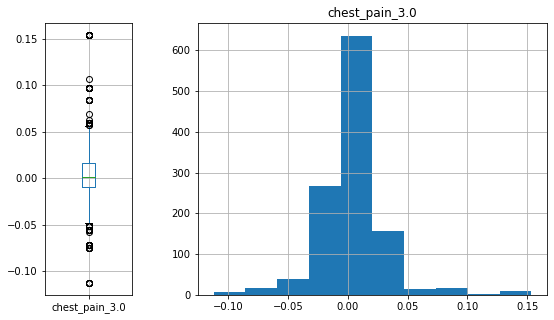

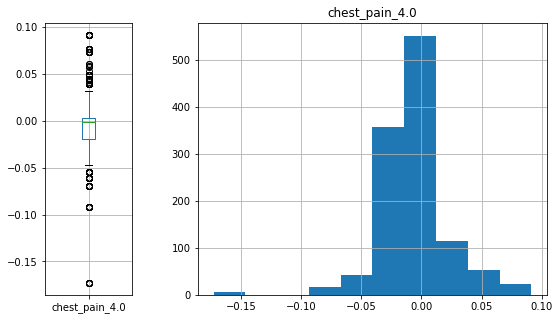

In [197]:
hist = X_locally.hist(bins=50, figsize=(20,20))
box = X_locally.boxplot()
plt.xticks(rotation='vertical')
plt.xticks(rotation='horizontal')
for name in X_locally.columns:
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    X_locally.boxplot(column=name,ax=axes[0])
    X_locally.hist(column=name, ax=axes[1])
plt.show()